### AI Investing in Portfolio of LENDING CLUB loans
#### HW1: AI-MBA Class
#### Dr. Swaroop Yalla, AI-driven Banking

In [33]:
# Import some libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

### read in csv file - you may have to change the working directory

In [34]:
df = pd.read_csv('lending_club_loans.csv', low_memory=False)   

In [35]:
df.shape

(42542, 115)

In [36]:
df1 = df.dropna(axis=1, thresh=int(0.80*len(df)))    ## drop all columns with >80% missing values

In [95]:
df1.shape

(42542, 58)

In [96]:
grades = []
for row in df.grade :
    if row == 'A' :
        grades.append('4')
    elif row == 'B' :
        grades.append('3')
    elif row == 'C' :
        grades.append('2')
    else : 
        grades.append('1')
        
df['grade'] = grades

In [100]:
home_ownership = []
for row in df.home_ownership :
    if row == 'OWN' :
        home_ownership.append('3')
    elif row == 'RENT' :
        home_ownership.append('2')
    else :
        home_ownership.append('1')

df['home_ownership'] = home_ownership

In [101]:
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599.0,5000.0,5000.0,4975.0,36.0,0.1065,162.87,1,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167.0,2500.0,2500.0,2500.0,60.0,0.1527,59.83,1,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524.0,2400.0,2400.0,2400.0,36.0,0.1596,84.33,1,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178.0,10000.0,10000.0,10000.0,36.0,0.1349,339.31,1,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748.0,3000.0,3000.0,3000.0,60.0,0.1269,67.79,1,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42537,70686,70681.0,5000.0,5000.0,0.0,36.0,0.0775,156.11,1,A3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42539,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42540,Total amount funded in policy code 1: 460296150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [102]:
# Create a new status dictionary - this is for making the dataset more manageable
new_status_dict = {
    'Fully Paid': 'Fully Paid',
    'Charged Off': 'Default',
    'Current': 'Current',
    'grade' : 'grade',
    'home_ownership': 'home_ownership',
    'Default': 'Default',
    'Late (31-120 days)': 'Default',
    'In Grace Period': 'Default',
    'Late (16-30 days)': 'Default',
    'Does not meet the credit policy. Status:Fully Paid': 'Fully Paid',
    'Does not meet the credit policy. Status:Charged Off': 'Default',
    'Issued': 'Issued'
}

df1['new_status'] = df1['loan_status'].map(new_status_dict)

<ipython-input-102-8d52522ce98b>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['new_status'] = df1['loan_status'].map(new_status_dict)


In [103]:
df1.groupby(['new_status']).count()
## There are 3 status codes now - Fully Paid or "good" loans, Default or "bad" loans, and "Current" loans

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
new_status,,,,,,,,,,,,,,,,,,,,,
Current,513,513,513,513,513,513,513,513,513,513,...,513,513,513,513,513,513,513,513,513,513
Default,6448,6448,6448,6448,6448,6448,6448,6448,6448,6448,...,6448,6448,6420,6448,6448,6445,6420,6445,6114,6437
Fully Paid,35574,35574,35574,35574,35574,35574,35574,35574,35574,35574,...,35574,35574,35457,35574,35574,35548,35457,35548,34543,35480


#### create two dataframes - df_invest (set of loans to invest in) and df_model (for modeling)

In [104]:
df_invest = df1[df1['new_status']=="Current"]   ## Use this Current dataset to "invest in"
df_model = df1[df1['new_status'] != "Current"]  ## Use this dataset for modeling of good/bad loans

In [105]:
df_model.groupby(['loan_status']).sum()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,dti,delinq_2yrs,...,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
loan_status,,,,,,,,,,,,,,,,,,,,,
Charged Off,4.910348e+09,68592650.0,66595800.0,6.159025e+07,261732.0,781.7289,1902921.99,3.532143e+08,79184.08,967.0,...,1.846381e+06,3368144.0,3116845.0,0.0,5653.0,0.0,0.0,0.0,373.0,0.0
Default,8.401520e+05,16000.0,16000.0,1.597500e+04,60.0,0.1640,392.50,7.000000e+04,9.69,0.0,...,3.925000e+02,594.0,590.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
Does not meet the credit policy. Status:Charged Off,3.413921e+08,7250225.0,7037825.0,4.419128e+06,30084.0,111.0843,232225.85,5.290922e+07,10915.58,163.0,...,2.324839e+05,458444.0,426690.0,0.0,761.0,0.0,0.0,0.0,66.0,0.0
Does not meet the credit policy. Status:Fully Paid,9.301888e+08,17600225.0,17254600.0,1.274535e+07,76344.0,277.8954,570693.62,1.431365e+08,28045.06,487.0,...,4.331733e+06,1335817.0,1303630.0,0.0,1988.0,4.0,0.0,6080.0,104.0,1.0
Fully Paid,2.827316e+10,368323025.0,359665975.0,3.428496e+08,1394304.0,3919.5869,10782006.85,2.349738e+09,442458.56,4784.0,...,1.044831e+08,23778187.0,23547930.0,0.0,33586.0,0.0,0.0,0.0,1302.0,0.0
In Grace Period,1.925282e+07,295900.0,274025.0,2.713843e+05,960.0,2.8708,6967.69,1.109582e+06,251.99,3.0,...,6.967690e+03,10089.0,9530.0,0.0,16.0,0.0,0.0,0.0,1.0,0.0
Late (16-30 days),5.766236e+06,73500.0,61025.0,6.070000e+04,300.0,0.6004,1382.19,4.375200e+05,42.90,1.0,...,1.381500e+03,3430.0,3410.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0
Late (31-120 days),1.356767e+07,224925.0,213950.0,2.127729e+05,720.0,2.0238,5293.88,1.012920e+06,205.19,4.0,...,4.599260e+03,7133.0,6590.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0


In [106]:
df_invest.groupby(['grade']).sum()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,dti,delinq_2yrs,...,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
grade,,,,,,,,,,,,,,,,,,,,,
A,24724887.0,233150.0,233150.0,2.307146e+05,1200.0,1.7300,4799.26,1185864.00,304.61,0.0,...,4864.79,14830.0,14750.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0
B,181015411.0,2952525.0,2889875.0,2.871340e+06,8940.0,17.3754,63920.42,10673917.48,2282.70,5.0,...,64159.70,108196.0,107600.0,0.0,149.0,0.0,0.0,0.0,0.0,0.0
C,148733475.0,2097075.0,2078900.0,2.070069e+06,7320.0,17.5544,48758.14,8736467.96,1914.35,7.0,...,49349.72,83599.0,83115.0,0.0,122.0,0.0,0.0,0.0,3.0,0.0
D,130937899.0,1706200.0,1693725.0,1.688841e+06,6420.0,18.5863,42460.42,8541924.44,1483.88,25.0,...,42840.62,74028.0,73600.0,0.0,107.0,0.0,0.0,0.0,5.0,0.0
E,90790461.0,1316225.0,1266375.0,1.261083e+06,4440.0,14.3109,33115.47,5780176.60,1140.66,21.0,...,33115.47,49391.0,48600.0,0.0,74.0,0.0,0.0,0.0,5.0,0.0
F,43219539.0,887600.0,882800.0,8.786614e+05,2100.0,7.5018,24114.72,3364412.00,475.14,12.0,...,26916.51,23575.0,22940.0,0.0,35.0,0.0,0.0,0.0,2.0,0.0
G,7321228.0,132125.0,132125.0,1.318382e+05,360.0,1.3761,3718.97,536400.00,108.00,1.0,...,3718.97,4144.0,4120.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0


In [107]:
df_invest.corr()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,dti,delinq_2yrs,...,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
member_id,1.000000,-0.019215,-0.030454,-0.029491,NaN,0.077728,-0.012352,-0.090164,0.022023,0.012606,...,-0.002625,-0.045100,-0.062116,NaN,NaN,NaN,NaN,NaN,-0.071527,NaN
loan_amnt,-0.019215,1.000000,0.983162,0.983077,NaN,0.090898,0.965987,0.413638,0.011886,-0.019496,...,0.834360,0.162135,0.133259,NaN,NaN,NaN,NaN,NaN,-0.036266,NaN
funded_amnt,-0.030454,0.983162,1.000000,0.999774,NaN,0.092786,0.982886,0.410268,0.019638,-0.038229,...,0.850005,0.159570,0.140476,NaN,NaN,NaN,NaN,NaN,-0.038205,NaN
funded_amnt_inv,-0.029491,0.983077,0.999774,1.000000,NaN,0.095506,0.983029,0.409858,0.018424,-0.038498,...,0.850196,0.158698,0.139530,NaN,NaN,NaN,NaN,NaN,-0.039415,NaN
term,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
int_rate,0.077728,0.090898,0.092786,0.095506,NaN,1.000000,0.254335,0.170984,-0.040200,0.212016,...,0.247785,-0.281094,-0.274427,NaN,NaN,NaN,NaN,NaN,0.099084,NaN
installment,-0.012352,0.965987,0.982886,0.983029,NaN,0.254335,1.000000,0.430600,0.019057,-0.000894,...,0.874798,0.112147,0.094757,NaN,NaN,NaN,NaN,NaN,-0.020221,NaN
annual_inc,-0.090164,0.413638,0.410268,0.409858,NaN,0.170984,0.430600,1.000000,-0.255647,0.068182,...,0.393845,0.017051,0.015720,NaN,NaN,NaN,NaN,NaN,0.001430,NaN
dti,0.022023,0.011886,0.019638,0.018424,NaN,-0.040200,0.019057,-0.255647,1.000000,-0.086719,...,0.009142,-0.037319,-0.020429,NaN,NaN,NaN,NaN,NaN,0.001816,NaN
delinq_2yrs,0.012606,-0.019496,-0.038229,-0.038498,NaN,0.212016,-0.000894,0.068182,-0.086719,1.000000,...,0.137630,-0.080927,-0.063994,NaN,NaN,NaN,NaN,NaN,-0.021807,NaN


<AxesSubplot:title={'center':'The distribution of installments by grade'}, xlabel='installment', ylabel='grade'>

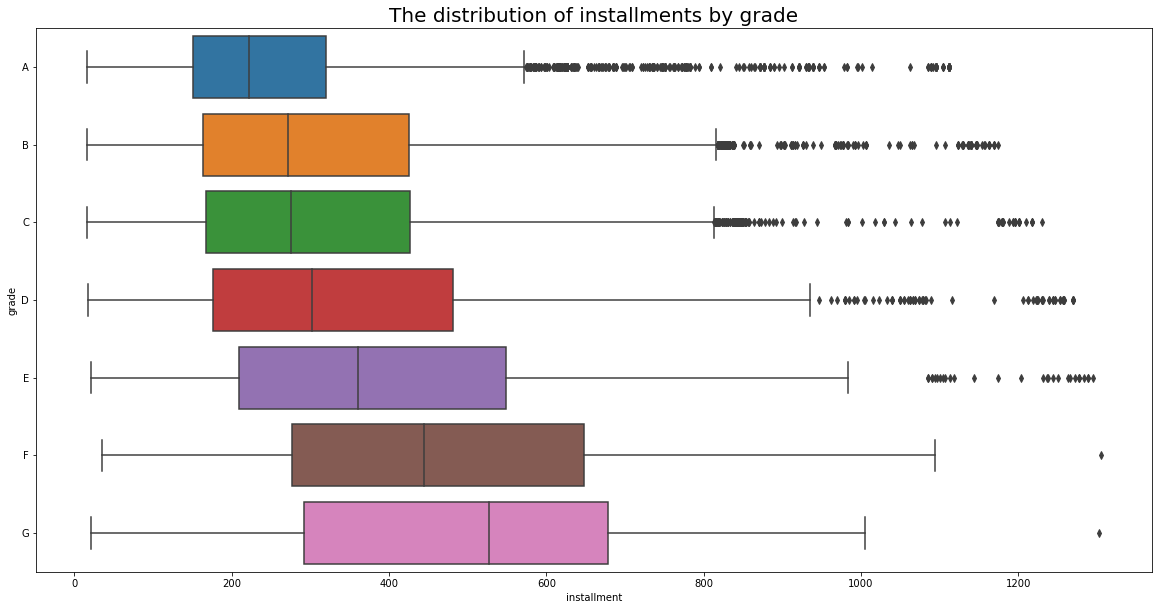

In [108]:
plt.subplots(figsize=(20,10))
plt.title("The distribution of installments by grade").set_size(20)
sns.boxplot(x="installment", y="grade", data=df_model, order ='ABCDEFG')

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='installment', ylabel='Density'>

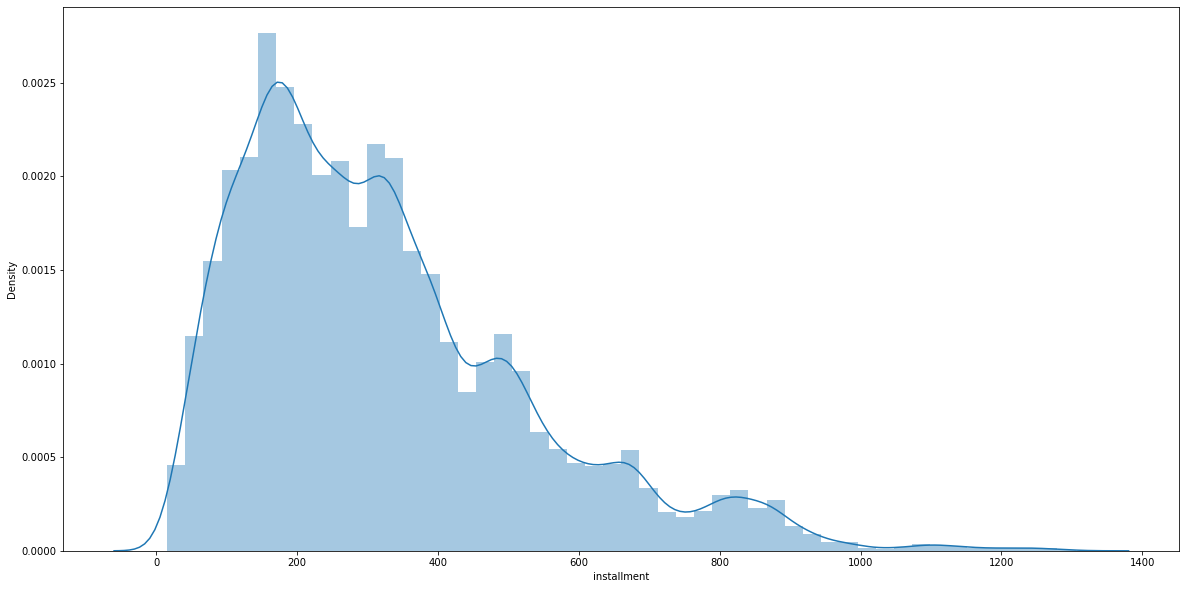

In [109]:
df_model2 = df_model.dropna(axis=0)
plt.subplots(figsize=(20,10))
sns.distplot(df_model2['installment'])

In [110]:
df_invest['loan_amnt'].sum()

9324900.0

### ML model (try - in class - simple model)

In [113]:
df_model_try = df_model[['loan_amnt','annual_inc','new_status','dti','delinq_2yrs','grade','home_ownership','total_acc']]  ## of course you need more variables!
df_model_try = df_model_try.dropna(axis=0)
df_model_try['default'] = np.where(df_model_try['new_status']  == "Default",1,0)  ##create 0 1 from new_status
df_model_try.drop('new_status',axis=1,inplace = True)

grades = []
for row in df_model_try.grade :
    if row == 'A' :
        grades.append('4')
    elif row == 'B' :
        grades.append('3')
    elif row == 'C' :
        grades.append('2')
    else :
        grades.append('1')
        
df_model_try['grade'] = grades

home_ownership = []
for row in df_model_try.home_ownership :
    if row == 'OWN' :
        home_ownership.append('3')
    elif row == 'RENT' :
        home_ownership.append('2')
    else :
        home_ownership.append('1')

df_model_try['home_ownership'] = home_ownership

df_model_try

,loan_amnt,annual_inc,dti,delinq_2yrs,grade,home_ownership,total_acc,default
0,5000.0,24000.0,27.65,0.0,3,2,9.0,0
1,2500.0,30000.0,1.00,0.0,2,2,4.0,1
2,2400.0,12252.0,8.72,0.0,2,2,10.0,0
3,10000.0,49200.0,20.00,0.0,2,2,37.0,0
5,5000.0,36000.0,11.20,0.0,4,2,12.0,0
...,...,...,...,...,...,...,...,...
42511,5350.0,4000.0,15.00,0.0,1,3,1.0,0
42513,10000.0,50000.0,7.22,2.0,1,2,20.0,0
42514,2000.0,150000.0,5.60,0.0,4,1,16.0,0
42515,6000.0,20000.0,12.90,0.0,2,2,6.0,0


In [114]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve

In [115]:
X = df_model_try.drop('default',axis=1)
y = df_model_try['default']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15,random_state=101)

In [116]:
clf_rf = RandomForestClassifier(n_estimators=30, random_state=21)
clf_rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=30, random_state=21)

In [117]:
y_pred_rf = clf_rf.predict(X_test)

# classification report
print(classification_report(y_test, y_pred_rf))

# ROC AUC score
print("AUC: {:.2f}\n".format(roc_auc_score(y_test, y_pred_rf)))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      5350
           1       0.29      0.04      0.06       949

    accuracy                           0.84      6299
   macro avg       0.57      0.51      0.49      6299
weighted avg       0.77      0.84      0.79      6299

AUC: 0.51



In [118]:
y_test.value_counts()

0    5350
1     949
Name: default, dtype: int64

In [119]:
confusion_matrix(y_test, y_pred_rf)

array([[5267,   83],
       [ 915,   34]])

In [120]:
feature_importances = pd.DataFrame(clf_rf.feature_importances_,index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
dti,0.282065
annual_inc,0.240210
loan_amnt,0.192824
total_acc,0.183916
grade,0.047189
home_ownership,0.031352
delinq_2yrs,0.022443


In [121]:
### Note there are two types of prediction
y_pred_rf = clf_rf.predict(X_test)
y_pred_rf_probabilities = clf_rf.predict_proba(X_test)

In [122]:
y_pred_rf_probabilities[:,1]

array([0.26666667, 0.2       , 0.03333333, ..., 0.1       , 0.33333333,
       0.        ])

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

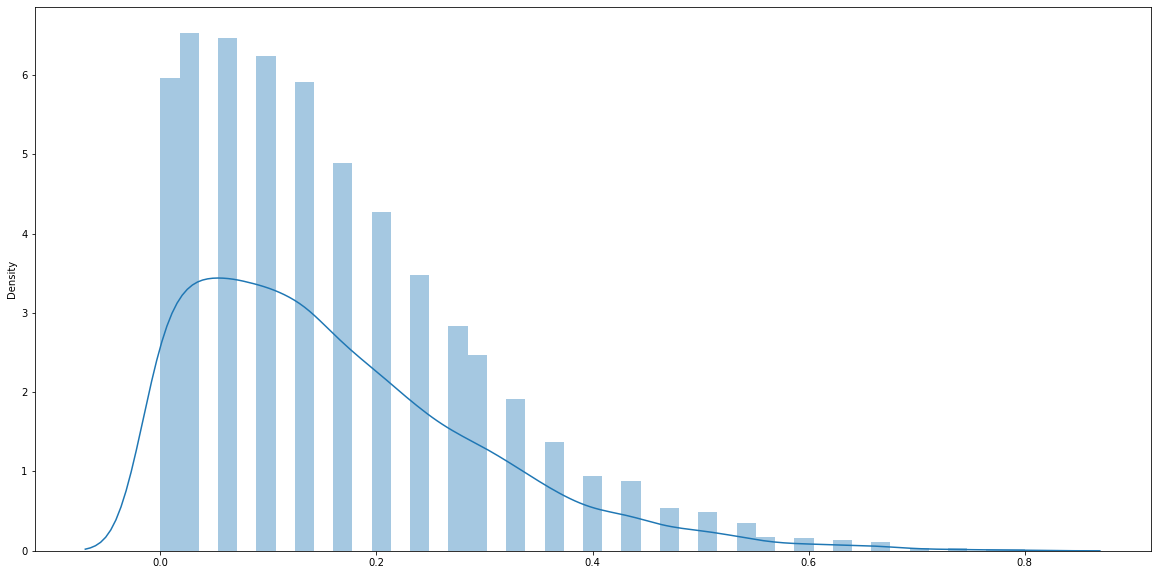

In [123]:
plt.subplots(figsize=(20,10))
sns.distplot(y_pred_rf_probabilities[:,1])

#### The model output can be either a 0/1 predicition using clf_rf.predict() function or probabilities using clf_rf.predict_proba() function. If using probabilities, any probability over 0.5 (50%) is a default, same as 1 in the predict funtion. you can check it. Note - this distribution shows that more loans are non-default than default

#### now Apply the model to invest portfolio

In [125]:
df_invest2 = df_invest[['loan_amnt','annual_inc','new_status','dti','delinq_2yrs','grade',
                        'home_ownership', 'total_acc']]  ## select the same variables as your model
df_invest2 = df_invest2.dropna(axis=0)
df_invest2.drop('new_status',axis=1,inplace = True)   ## note you dont need new_status as all are "current"

grades = []
for row in df_invest2.grade :
    if row == 'A' :
        grades.append('4')
    elif row == 'B' :
        grades.append('3')
    elif row == 'C' :
        grades.append('2')
    else :
        grades.append('1')
        
df_invest2['grade'] = grades

home_ownership = []
for row in df_invest2.home_ownership :
    if row == 'OWN' :
        home_ownership.append('3')
    elif row == 'RENT' :
        home_ownership.append('2')
    else :
        home_ownership.append('1')

df_invest2['home_ownership'] = home_ownership


In [126]:
X_invest = df_invest2  
X_invest
y_pred_invest = clf_rf.predict_proba(X_invest)        ## this is where you are predicting for invest portfolio

In [127]:
df_invest2['default_pr'] = y_pred_invest[:,1]   ## add a column of default probability to invest dataframe

In [128]:
df_invest2

,loan_amnt,annual_inc,dti,delinq_2yrs,grade,home_ownership,total_acc,default_pr
4,3000.0,80000.0,17.94,0.0,3,2,38.0,0.300000
32,10000.0,29120.0,22.83,0.0,2,2,31.0,0.166667
39,12500.0,27000.0,16.04,0.0,3,2,24.0,0.333333
86,14000.0,28000.0,6.34,0.0,1,2,10.0,0.766667
95,15300.0,85000.0,20.58,0.0,1,2,27.0,0.100000
...,...,...,...,...,...,...,...,...
8096,16000.0,105000.0,9.57,0.0,2,2,8.0,0.100000
8161,15000.0,80000.0,10.74,0.0,1,1,12.0,0.200000
8370,30000.0,80004.0,9.06,0.0,2,1,21.0,0.166667
8473,18000.0,150000.0,16.82,0.0,1,1,28.0,0.166667


In [129]:
df_invest2.sort_values(by =['default_pr'])    ### sort loans by lowest probability of default

,loan_amnt,annual_inc,dti,delinq_2yrs,grade,home_ownership,total_acc,default_pr
3673,17500.0,35000.0,15.15,0.0,3,1,17.0,0.000000
4727,35000.0,150000.0,7.55,0.0,3,1,24.0,0.000000
3647,20000.0,120000.0,9.54,0.0,3,1,53.0,0.000000
5175,11100.0,85356.0,21.23,0.0,4,1,39.0,0.000000
5490,16200.0,70000.0,23.19,0.0,3,2,24.0,0.000000
...,...,...,...,...,...,...,...,...
1614,35000.0,65000.0,23.80,0.0,2,1,32.0,0.600000
5846,20000.0,65000.0,20.34,0.0,1,3,22.0,0.633333
2695,19075.0,50000.0,22.75,1.0,1,2,51.0,0.633333
335,20000.0,50000.0,22.82,0.0,1,2,22.0,0.633333


#### now pick the loans that have lowest default prob but highest interst rate so that you optimize the portfolio management